# Лабораторная работа
## Выполнил: Сергеев Александр, 18 МАГ ИАД
### Датасет: https://archive.ics.uci.edu/ml/datasets/seismic-bumps
#### Задача классификации состоит в предсказании повышенной сейсмической активности, способной вызвать внезапное обрушение в шахте. Таким образом, существует 2 класса - опасный (на следующий день произошло обрушение) и неопасный (обрушение не произошло).
#### Набор данных не имеет пропущенных значений.
#### Информация об атрибутах:
1. seismic: результат оценки сейсмической опасности сдвига в шахте, полученный сейсмическим методом (a - отсутствие опасности, b - низкая опасность, c - высокая опасность, d - состояние опасности);
2. seismoacoustic: результат оценки сейсмической опасности сдвига в шахте, полученный сейсмоакустическим методом;
3. shift: информация о типе рабочего дня (W - добыча угля, N - подготовка);
4. genergy: сейсмическая энергия, зарегистрированная в предыдущий рабочий день самым активным геофоном (GMax);
5. gpuls: количество импульсов, записанных в предыдущий рабочий день GMax`ом;
6. gdenergy: отклонение энергии, записанное в предыдущий рабочий день GMax`ом от средней энергии
полученной за 8 предыдущих дней;
7. gdpuls: отклонение количества импульсов, зарегистрированных  в предыдущий рабочий день GMax`ом от среднего числа
импульсов, полученного за 8 предыдущих дней;
8. ghazard: результат оценки сейсмической опасности сдвига в шахте, полученной сейсмоакустическим методом GMax`ом;
9. nbumps: количество сейсмических ударов, зарегистрированных в предыдущий рабочий день;
10. nbumps2: количество сейсмических ударов (в диапазоне энергий [10 ^ 2,10 ^ 3)), зарегистрированных в предыдущий рабочий день;
11. nbumps3: количество сейсмических ударов (в диапазоне энергий [10 ^ 3,10 ^ 4)), зарегистрированных в предыдущий рабочий день;
12. nbumps4: количество сейсмических ударов (в диапазоне энергий [10 ^ 4,10 ^ 5)), зарегистрированных в предыдущий рабочий день;
13. nbumps5: количество сейсмических ударов (в диапазоне энергий [10 ^ 5,10 ^ 6)), зарегистрированных в предыдущий рабочий день;
14. nbumps6: количество сейсмических ударов (в диапазоне энергий [10 ^ 6,10 ^ 7)), зарегистрированных в предыдущий рабочий день;
15. nbumps7: количество сейсмических ударов (в диапазоне энергий [10 ^ 7,10 ^ 8)), зарегистрированных в предыдущий рабочий день;
16. nbumps8,9: количество сейсмических ударов (в диапазоне энергий [10 ^ 8,10 ^ 10)), зарегистрированных в предыдущий рабочий день;
17. energy: полная энергия сейсмических ударов, зарегистрированная в предыдущий рабочий день;
18. maxenergy: максимальная энергия сейсмических ударов, зарегистрированная в предыдущий рабочий день;
19. calss: атрибут принятия решения - «1» означает, что сейсмический удар высокой энергии произошел в следующий рабочий день
(«опасное состояние»), «0» означает, что в следующий рабочий день сейсмических волн с высокой энергией не произошло
(«неопасное состояние»).

# Лабораторная работа №1

#### Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Читаем датасет из локального файла с помощью функции pandas read_csv:

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00266/seismic-bumps.arff'
#data = pd.read_csv(url, sep = ',', engine='python')
data = pd.read_csv('datasets/seismic-bumps.csv', engine = 'python')

#### Узнаем тип данных и выводим первые (функция head) и последние (функция tail) 5 записей

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.tail()

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


#### Узнаем размерность и названия колонок

In [6]:
print(data.shape)
print(data.columns)

(2584, 19)
Index(['%seismic', 'seismoacoustic', 'shift', 'genergy', 'gplus', 'gdenergy',
       'gdpuls', 'hazard', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5',
       'bumps6', 'bumps7', 'bumps8', 'energy', 'maxenergy', 'class'],
      dtype='object')


#### Узнаем количество записей и выведем значения атрибута shift

In [7]:
data.index

RangeIndex(start=0, stop=2584, step=1)

In [8]:
data['shift']

0       N
1       N
2       N
3       N
4       N
5       W
6       W
7       N
8       N
9       W
10      N
11      N
12      W
13      N
14      N
15      W
16      N
17      N
18      N
19      N
20      N
21      N
22      N
23      N
24      W
25      N
26      N
27      W
28      N
29      W
       ..
2554    W
2555    W
2556    W
2557    W
2558    N
2559    N
2560    N
2561    N
2562    N
2563    W
2564    W
2565    W
2566    W
2567    W
2568    W
2569    W
2570    W
2571    W
2572    W
2573    W
2574    W
2575    W
2576    W
2577    W
2578    W
2579    W
2580    W
2581    W
2582    W
2583    W
Name: shift, Length: 2584, dtype: object

In [9]:
data['shift'][3]

'N'

#### Узнаем типы различных атрибутов различными способами и выводим первые 5 значений с помощью head

In [10]:
data['bumps'].dtype.name

'int64'

In [11]:
type(data['shift'][3])

str

In [12]:
data[['shift', 'genergy']].head()

,shift,genergy
0,N,15180
1,N,14720
2,N,8050
3,N,28820
4,N,12640


#### Выводим описательную статистику по атрибутам (по-умолчанию только по числовым)

In [13]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


#### Строим диаграмму рассеяния и выводим матрицу корреляции для демонстрации наличия или отсутствия корреляции между переменными

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


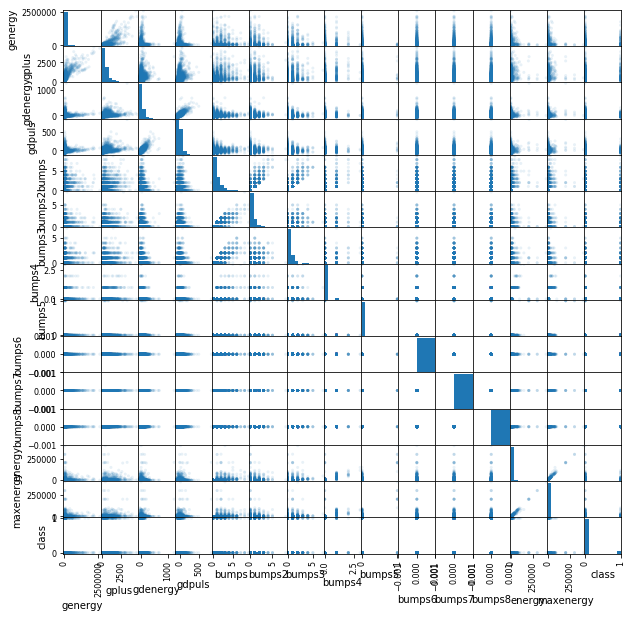

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .1, figsize = (10, 10))
pass

In [15]:
data.corr()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gplus,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
bumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144
bumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,NaN,NaN,NaN,0.124650,0.085032,0.201381
bumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,NaN,NaN,NaN,0.244083,0.176480,0.205327
bumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,NaN,NaN,NaN,0.489828,0.416483,0.075458
bumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,NaN,NaN,NaN,0.773605,0.808406,0.004834
bumps6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Строим различные графики зависмости bumps и genergy

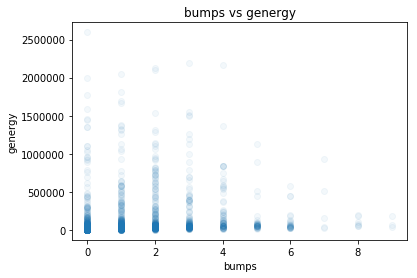

In [16]:
plt.plot(data['bumps'], data['genergy'], 'o', alpha = 0.05)
plt.xlabel('bumps')
plt.ylabel('genergy')
plt.title('bumps vs genergy')
pass

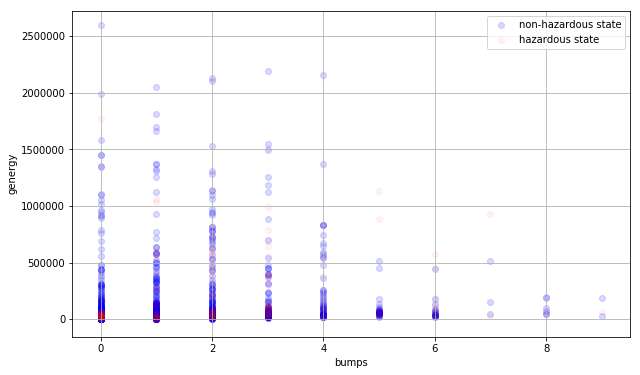

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['bumps'],
            data[data['class'] == 0]['genergy'],
            alpha = 0.15,
            label = 'non-hazardous state',
            color = 'b')

plt.scatter(data[data['class'] == 1]['bumps'],
            data[data['class'] == 1]['genergy'],
            alpha = 0.05,
            label = 'hazardous state',
            color = 'r')

plt.xlabel('bumps')
plt.ylabel('genergy')
plt.legend()
plt.grid()

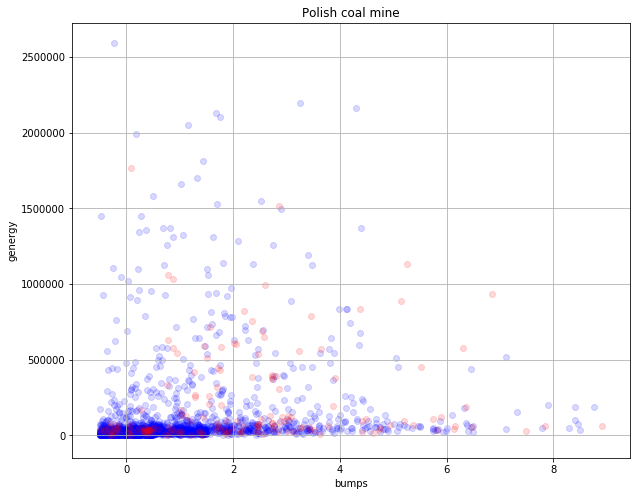

In [18]:
np.random.seed(0)
bumps_rnd = data['bumps'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(bumps_rnd[data['class'] == 0],
            data[data['class'] == 0]['genergy'],
            alpha = 0.15,
            label = 'non-hazardous state',
            color = 'b')

plt.scatter(bumps_rnd[data['class'] == 1],
            data[data['class'] == 1]['genergy'],
            alpha = 0.15,
            label = 'hazardous state',
            color = 'r')

plt.xlabel('bumps')
plt.ylabel('genergy')
plt.title('Polish coal mine')
plt.grid()

#### Выводим описательную статистику по всем атрибутам

In [19]:
data.describe(include = 'all')

,%seismic,seismoacoustic,shift,genergy,gplus,gdenergy,gdpuls,hazard,bumps,bumps2,bumps3,bumps4,bumps5,bumps6,bumps7,bumps8,energy,maxenergy,class
count,2584,2584,2584,2.584000e+03,2584.000000,2584.000000,2584.000000,2584,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
unique,2,3,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,a,a,W,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1682,1580,1663,NaN,NaN,NaN,NaN,2342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.024252e+04,538.579334,12.375774,4.508901,NaN,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,NaN,NaN,NaN,2.292005e+05,562.652536,80.319051,63.166556,NaN,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,NaN,NaN,NaN,1.000000e+02,2.000000,-96.000000,-96.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.166000e+04,190.000000,-37.000000,-36.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2.548500e+04,379.000000,-6.000000,-6.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,5.283250e+04,669.000000,38.000000,30.250000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000


#### Выводим все возможные значения, которые принимают атрибуты shift, seismoacoustic, seismic

In [20]:
data['shift'].unique()

array(['N', 'W'], dtype=object)

In [21]:
data['seismoacoustic'].unique()

array(['a', 'b', 'c'], dtype=object)

In [22]:
data['%seismic'].unique()

array(['a', 'b'], dtype=object)

# Готовим данные

#### Замечаем, что
`bumps6`, `bumps7`и `bumps8`= 0 для всех объектов датасета, т.е. должны быть удалены из датасета, так как никак не повлияют на результат классификации

In [3]:
print(data[data['bumps6'] != 0]['bumps6'])

Series([], Name: bumps6, dtype: int64)


In [4]:
print(data[data['bumps7'] != 0]['bumps7'])

Series([], Name: bumps7, dtype: int64)


In [3]:
print(data[data['bumps8'] != 0]['bumps8'])

Series([], Name: bumps8, dtype: int64)


In [3]:
data = data.drop('bumps6',   axis = 1)\
           .drop('bumps7',   axis = 1)\
           .drop('bumps8',      axis = 1) 

#### Выделяем из данных категориальные и количественные признаки

In [4]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['%seismic', 'seismoacoustic', 'shift', 'hazard']
['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3', 'bumps4', 'bumps5', 'energy', 'maxenergy', 'class']


In [5]:
for c in categorical_columns:
    print(c, data[c].unique())

%seismic ['a' 'b']
seismoacoustic ['a' 'b' 'c']
shift ['N' 'W']
hazard ['a' 'b' 'c']


#### Проводим векторизацию для категориальных признаков (заменяем их на эквивалентные количественные). Отдельно обрабатываем бинарные и небинарные признаки.

In [6]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['%seismic', 'shift'] ['seismoacoustic', 'hazard']


In [7]:
data.at[data['shift'] == 'N', 'shift'] = 0
data.at[data['shift'] == 'W', 'shift'] = 1
data['shift'].describe()

count    2584.000000
mean        0.643576
std         0.479035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: shift, dtype: float64

In [8]:
data.at[data['%seismic'] == 'a', '%seismic'] = 0
data.at[data['%seismic'] == 'b', '%seismic'] = 1
data['%seismic'].describe()

count    2584.000000
mean        0.349071
std         0.476769
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: %seismic, dtype: float64

In [9]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a',
       'hazard_b', 'hazard_c'],
      dtype='object')


#### Нормализуем количественные признаки (при этом оставляем целевой столбец class нетронутым)

In [10]:
data_numerical = data[numerical_columns]
data_numerical = data_numerical.drop(('class'), axis = 1)
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [11]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [12]:
data_numerical.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01


## Соединяем все в одну таблицу

In [13]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns], data['class']), axis = 1)
print(data.shape)

(2584, 20)


In [14]:
data.describe()

,genergy,gplus,gdenergy,gdpuls,bumps,bumps2,bumps3,bumps4,bumps5,energy,maxenergy,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,hazard_a,hazard_b,hazard_c,%seismic,shift,class
count,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,-3.542488e-16,-1.529135e-16,-9.604890e-17,-1.501422e-16,-5.364560e-15,3.492562e-15,1.264554e-15,-2.837277e-15,4.060972e-16,1.129579e-15,-8.477266e-16,0.611455,0.369969,0.018576,0.906347,0.082043,0.011610,0.349071,0.643576,0.065789
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.487514,0.482889,0.135048,0.291402,0.274484,0.107143,0.476769,0.479035,0.247962
min,-3.932911e-01,-9.536602e-01,-1.349316e+00,-1.591173e+00,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.428549e-01,-6.195286e-01,-6.147455e-01,-6.413030e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.825366e-01,-2.836197e-01,-2.287848e-01,-1.663681e-01,-6.298621e-01,-5.021560e-01,-5.103247e-01,-2.426888e-01,-6.829220e-02,-2.432796e-01,-2.210441e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.632196e-01,2.317961e-01,3.190305e-01,4.075115e-01,1.029446e-01,7.737252e-01,7.888664e-01,-2.426888e-01,-6.829220e-02,-1.161454e-01,-1.177247e-01,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.093107e+01,7.072608e+00,1.534660e+01,1.319513e+01,5.965398e+00,9.704893e+00,8.584013e+00,1.050773e+01,1.463729e+01,1.941362e+01,2.044283e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Проблема несбалансированности данных

In [15]:
data['class'].value_counts()

0    2414
1     170
Name: class, dtype: int64

In [16]:
# Class count 0-no, 1-yes
count_class_0, count_class_1 = data['class'].value_counts()

# Divide by class
df_class_0 = data[data['class'] == 0]
df_class_1 = data[data['class'] == 1]

Python imbalanced-learn module

In [17]:
import imblearn
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#FF2D00', '#0049FF']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Выделяем X и Y, отбрасывая столбец class и применяя сэмплирование

2244 new random picked points


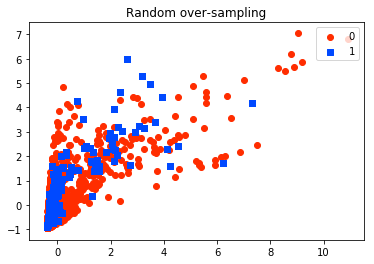

{0: 2414, 1: 2414}

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X = data.drop(('class'), axis = 1)
y = data['class']
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
unique, counts = np.unique(y_ros, return_counts=True)
dict(zip(unique, counts))

In [19]:
feature_names = X.columns

In [20]:
feature_names

Index(['genergy', 'gplus', 'gdenergy', 'gdpuls', 'bumps', 'bumps2', 'bumps3',
       'bumps4', 'bumps5', 'energy', 'maxenergy', 'seismoacoustic_a',
       'seismoacoustic_b', 'seismoacoustic_c', 'hazard_a', 'hazard_b',
       'hazard_c', '%seismic', 'shift'],
      dtype='object')

## Разделение на тестовую и обучающую выборки

30% тестовая выборка, 70% обучающая

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3379 1449


# $k$NN

Тренируем классификатор методом k ближайших соседей, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [100]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.12400118378218408 0.15458937198067632


In [101]:
err_test = 1 - knn.score(X_test, y_test)

In [102]:
err_test

0.15458937198067635

In [103]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[553 191]
 [ 33 672]]


In [104]:
pd.crosstab(y_test, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,553,191,744
1,33,672,705
All,586,863,1449


### Подбор параметра k ближайших соседей

Тренируем классификатор с выбранным параметром

In [105]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.03699319325244155 1


In [106]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.04071773636991028


In [107]:
pd.crosstab(y_test, y_test_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,685,59,744
1,0,705,705
All,685,764,1449


# SVC

Тренируем классификатор с помощью машины опорных векторов, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [108]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_test_predict = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23142941698727434 0.22291235334713597


In [109]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[616 128]
 [195 510]]


### Подбор параметров

In [110]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.0 0.1


In [111]:
svc = SVC(C = best_C).fit(X_train, y_train)
y_test_predict = svc.predict(X_test)
err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2701982835158331 0.25948930296756384


In [112]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[597 147]
 [229 476]]


### Значимость признаков

In [113]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [117]:
N, d = X.shape
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Features ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Features ranking:
 1. feature 'genergy' (0.184367)
 2. feature 'gplus' (0.171899)
 3. feature 'gdenergy' (0.130969)
 4. feature 'gdpuls' (0.126962)
 5. feature 'energy' (0.085172)
 6. feature 'bumps' (0.076401)
 7. feature 'maxenergy' (0.061230)
 8. feature 'bumps2' (0.047134)
 9. feature 'bumps3' (0.024303)
10. feature 'shift' (0.021462)
11. feature '%seismic' (0.017713)
12. feature 'seismoacoustic_b' (0.013327)
13. feature 'seismoacoustic_a' (0.013231)
14. feature 'hazard_a' (0.008365)
15. feature 'bumps4' (0.006845)
16. feature 'hazard_b' (0.006568)
17. feature 'seismoacoustic_c' (0.002526)
18. feature 'hazard_c' (0.001245)
19. feature 'bumps5' (0.000282)


In [118]:
feature_names[[1,0,1]]

Index(['gplus', 'genergy', 'gplus'], dtype='object')

(-1, 19)

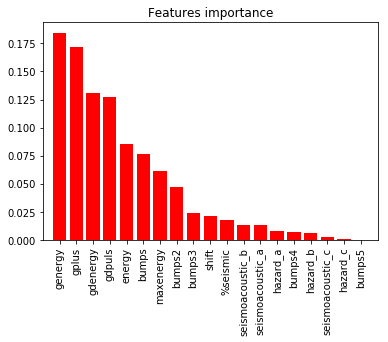

In [119]:
d_first = 19
plt.title("Features importance")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Значимость признаков сильно различается, поэтому возможно, что удаление наименее значимых признаков сильно повлияет в лучшую сторону на эффективность классификатора

# Вывод

Наименьшую ошибку на тестовой выборке показал метод K ближайших соседей.
При этом все методы показали высокую ошибку 2-го рода. Наименьшую ошибку 2-го рода при относительно низкой ошибке на тестовой выборке показал метод GBT.
Следует отметить, что на такую большую ошибку 2-го рода во многом влияет наличие некоторых мало значимых признаков, а также малое количество положительных записей (class = 1) в данных (170 из 2584).

# Лабораторная работа №2

# Нейронная сеть

In [120]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [121]:
mlp_model.n_layers_

3

Ошибки на обучающей и тестовой выборках:

In [122]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.12755253033441846 0.17322291235334714


### Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha

In [123]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (10,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

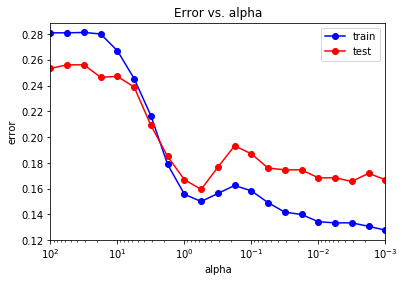

In [124]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [125]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.127848475880438 0.15942028985507245


Оптимальное значение alpha:

In [126]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.5623413251903491


Подберем оптимальное количество нейронов

In [127]:
neurons_arr = np.arange(4,50,2)
test_err = []
train_err = []
for neuron_size in neurons_arr:
    hidden_layer_sizes = (neuron_size,)
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes, 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

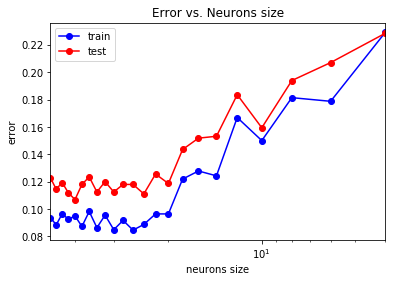

In [128]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. Neurons size')
plt.xlabel('neurons size')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [129]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.08464042616158626 0.1069703243616287


Оптимальное количество нейронов

In [130]:
index = test_err.index(min_test_err)
neuron_size_opt = neurons_arr[index]
print(neuron_size_opt)

40


### Классификатор при найденных оптимальных значениях гиперпараметров:

2 скрытых слоя:

In [131]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.11482687185557858
0.13250517598343686


In [132]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,643,101,744
1,91,614,705
All,734,715,1449


1 скрытый слой:

In [133]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_size_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0949985202722699
0.1069703243616287


Матрица рассогласования:

In [134]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,659,85,744
1,70,635,705
All,729,720,1449


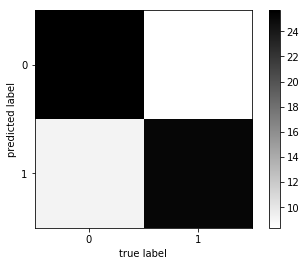

In [135]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

### Другие метрики качества:

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       744
           1       0.88      0.90      0.89       705

   micro avg       0.89      0.89      0.89      1449
   macro avg       0.89      0.89      0.89      1449
weighted avg       0.89      0.89      0.89      1449



# Вывод

Наименьшую ошибку на тестовой выборке показала нейронная сеть с одним скрытым слоем. Переобучение/недообучение отсутствует. При этом вследствии несбалансированности датасета нейронная сеть показала высокую ошибку 2-го рода. Тем не менее рассматриваемые показатели для нейросети оказались лучше, чем для классификаторов, использовавшихся ранее.

Для борьбы с высокой несбалансированностью данных необходимо следующее:

Применить Undersampling, Oversampling или алгоритм Smote и т.п.
Поскольку наша цель - прогнозировать опасную сейсмическую активность, очень важно выявить большое количество TP и свести к минимуму FN. Следовательно, нашей самой важной метрикой успеха является recall. Таким образом, при подборе гиперпараметров необходимо оптимизировать recall, а именно оптимизировать его применительно к области под ROC-кривой, тем самым максимизируя количество TP при сохранении относительно низкого количества FP.

# Лабораторная работа №3

# Random Forest

Тренируем классификатор с помощью алогоритма случайный лес, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [22]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_test_predict = rf.predict(X_test)
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.017943409247757072


Подберем оптимальное значение параметра n_estimators (the number of trees in the forest) и построим графики зависимости ошибки (на тестовой и обучающейся выборках, а также oob-ошибку) от количества используемых деревьев

In [58]:
n_estimators_arr = np.arange(10,600,10) 
test_err = []
train_err = []
oob_err = []
for n_estimators in n_estimators_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = n_estimators, oob_score=True, random_state = 42)
    rf.fit(X_train, y_train)
    
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_) 

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


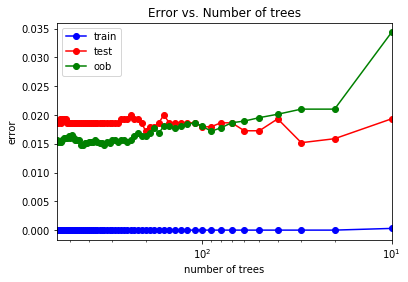

In [59]:
plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.semilogx(n_estimators_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(n_estimators_arr), np.min(n_estimators_arr)])
plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [60]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.01518288474810214


Оптимальное число деревьев

In [61]:
index = test_err.index(min_test_err)
n_estimators_opt = n_estimators_arr[index]
print(n_estimators_opt)

30


Классификатор при найденном оптимальном значении:

In [35]:
rf = ensemble.RandomForestClassifier(n_estimators = n_estimators_opt, random_state = 42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.01518288474810214


In [36]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,722,22,744
1,0,705,705
All,722,727,1449


# Extremely Randomized Trees

Тренируем классификатор с помощью метода сверхслучайных деревьев, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [88]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100, bootstrap=True, random_state = 42).fit(X_train, y_train)
y_test_predict = ert.predict(X_test)
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.022084195997239476


In [89]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[712  32]
 [  0 705]]


Подберем оптимальное значение параметра n_estimators (the number of trees in the forest) и построим графики зависимости ошибки (на тестовой и обучающейся выборках, а также oob-ошибку) от количества используемых деревьев

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

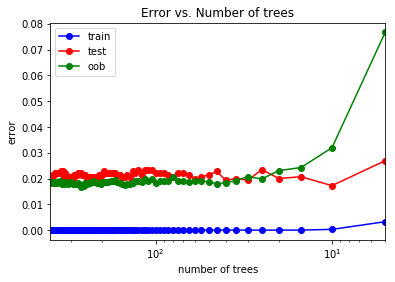

In [83]:
n_estimators_arr = np.arange(5,400,5) 
test_err = []
train_err = []
oob_err = []
for n_estimators in n_estimators_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = n_estimators, oob_score=True, bootstrap=True, random_state = 42)
    ert.fit(X_train, y_train)
    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - ert.oob_score_)

plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.semilogx(n_estimators_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(n_estimators_arr), np.min(n_estimators_arr)])
plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [84]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.01725327812284334


Оптимальное число деревьев

In [85]:
index = test_err.index(min_test_err)
n_estimators_opt = n_estimators_arr[index]
print(n_estimators_opt)

10


Классификатор при найденном оптимальном значении:

In [86]:
ert = ensemble.ExtraTreesClassifier(n_estimators = n_estimators_opt, bootstrap=True, random_state = 42)
ert.fit(X_train, y_train)
y_train_pred = ert.predict(X_train)
y_test_pred = ert.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0002959455460195324
0.01725327812284334


In [87]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,719,25,744
1,0,705,705
All,719,730,1449


# AdaBoost

Тренируем классификатор с помощью алгоритма Adaptive Boosting, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [24]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000, random_state = 42)
ada.fit(X_train, y_train)
y_test_predict = ada.predict(X_test)
err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.07369044095886357 0.09316770186335403


In [25]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[635 109]
 [ 26 679]]


Подберем оптимальное значение параметра n_estimators (the number of trees in the forest) и построим графики зависимости ошибки (на тестовой и обучающейся выборках) от количества используемых деревьев

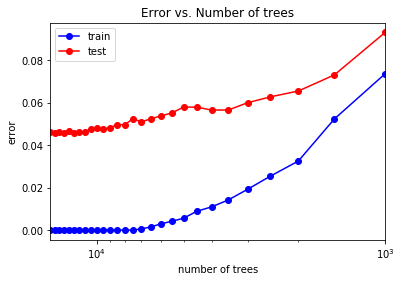

In [41]:
n_estimators_arr = np.arange(1000,15000,500) 
test_err = []
train_err = []
for n_estimators in n_estimators_arr:
    ada = ensemble.AdaBoostClassifier(n_estimators = n_estimators, random_state = 42)
    ada.fit(X_train, y_train)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(n_estimators_arr), np.min(n_estimators_arr)])
plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [42]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.045548654244306416


Оптимальное число деревьев

In [43]:
index = test_err.index(min_test_err)
n_estimators_opt = n_estimators_arr[index]
print(n_estimators_opt)

12000


Классификатор при найденном оптимальном значении:

In [44]:
ada = ensemble.AdaBoostClassifier(n_estimators = n_estimators_opt, random_state = 42)
ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.045548654244306416


In [45]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,678,66,744
1,0,705,705
All,678,771,1449


# GBT

Тренируем классификатор с помощью алгоритма Gradient Boosting, выводим ошибки на тестовой и обучающей выборках, 
а также матрицу несоответствий для определения ошибок первого и второго рода

In [121]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000, random_state = 42)
gbt.fit(X_train, y_train)
y_test_predict = gbt.predict(X_test)
err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != y_test_predict)

print(err_train, err_test)

0.0 0.04278812974465148


In [122]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[682  62]
 [  0 705]]


Подберем оптимальное значение параметра n_estimators (the number of trees in the forest) и построим графики зависимости ошибки (на тестовой и обучающейся выборках) от количества используемых деревьев

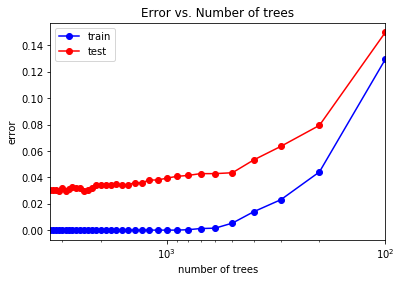

In [94]:
n_estimators_arr = np.arange(100,3500,100) 
test_err = []
train_err = []
for n_estimators in n_estimators_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = n_estimators, random_state = 42)
    gbt.fit(X_train, y_train)
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

plt.semilogx(n_estimators_arr, train_err, 'b-o', label = 'train')
plt.semilogx(n_estimators_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(n_estimators_arr), np.min(n_estimators_arr)])
plt.title('Error vs. Number of trees')
plt.xlabel('number of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:

In [95]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.029675638371290544


Оптимальное число деревьев

In [96]:
index = test_err.index(min_test_err)
n_estimators_opt = n_estimators_arr[index]
print(n_estimators_opt)

2400


Классификатор при найденном оптимальном значении:

In [97]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = n_estimators_opt, random_state = 42)
gbt.fit(X_train, y_train)
y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.029675638371290544


In [98]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,701,43,744
1,0,705,705
All,701,748,1449


# Вывод

Наименьшую ошибку на тестовой выборке (0.01518288474810214) показал алгоритм Random Forest. Наибольшую (0.045548654244306416) - Adaptive Boosting. Во всех случаях ошибка на тренировочной выборке = 0, однако сильное переообучение не наблюдается, так как ошибка на тестовой выборке также низка. Oob-ошибка зависит от числа деревьев примерно также, как и ошибка на тестовой выборке, однако малое число деревьев влияет на ее подъем намного сильнее. По сравнению с результатами предыдущих классификаторов ошибки на обучающей и тестовой выборках значительно уменьшились.